In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.auto import tqdm
import sys
import matplotlib
import seaborn as sns
from scipy import stats

sns.set_context("paper", font_scale=1.3)
sns.set_style("ticks", {"axes.grid": True, "grid.color": "0.95", "grid.linestyle": "-"})
plt.rcParams['axes.titlesize'] = 14
pd.set_option('max_rows', 100)

# Time-of-day factor

In [169]:
def re_resample_data(data,sampling_freq):
    # Fix datetime type
    data['datetime']=pd.to_datetime(data['datetime'])
    data=data.sort_values(by=["ticker", "date", "datetime"])
    
    # Resample on a given basis
    resample=(
    data.set_index("datetime")
    .groupby(["ticker", "ticker_desc", "date"])
    .resample(sampling_freq,label = 'right',closed='right')[["price"]]
    .last()
    .reset_index().copy()
    )
    
    # Forward fill missing prices for particular intervals using last observed price
    resample["price"] = (
    resample.sort_values(by="datetime")
    .groupby(["ticker", "ticker_desc", "date"])["price"]
    .fillna(method="ffill")
    )
#     #fill size
#     resample["size"] = (
#     resample.sort_values(by="datetime")
#     .groupby(["ticker", "ticker_desc", "date"])["size"]
#     .fillna(method="ffill")
#     )
       
    
    
    # Add returns
    resample = resample.sort_values(by=["ticker", "date", "datetime"])
    resample["log_price"] = np.log(resample["price"])
    resample["return"] = resample.groupby(["ticker", "date"])["log_price"].diff(1).fillna(0)
    
    return resample

In [170]:
ticker_5s = pd.read_csv('../data/ticker_5s.csv')

In [171]:
ticker_df = pd.read_csv('../data/ticker.csv')

In [172]:
ticker = pd.read_csv('../data/ticker.csv')

In [173]:
ticker_5s.query('ticker == "ANGL" and date=="2020-04-01"').head(10)

,ticker,ticker_desc,date,datetime,price,size,log_price,return
619976,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:30:00,25.05,3637.0,3.220874,0.000000
619977,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:30:05,25.05,3637.0,3.220874,0.000000
619978,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:30:10,25.05,3637.0,3.220874,0.000000
619979,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:30:15,25.04,40.0,3.220475,-0.000399
619980,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:30:20,25.44,100.0,3.236323,0.015848
619981,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:30:25,25.44,100.0,3.236323,0.000000
619982,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:30:30,25.44,100.0,3.236323,0.000000
619983,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:30:35,25.44,100.0,3.236323,0.000000
619984,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:30:40,25.44,100.0,3.236323,0.000000
619985,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:30:45,25.44,100.0,3.236323,0.000000


In [174]:
ticker.query('ticker == "ANGL" and date=="2020-04-01"').head(10)

,DATE,TIME_M,EX,ticker,SYM_SUFFIX,size,price,ticker_desc,datetime,date
169268,20200401,9:30:00.081856609,Q,ANGL,NaN,3637,25.05,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01 09:30:00.081856609,2020-04-01
169269,20200401,9:30:00.081876534,Q,ANGL,NaN,3637,25.05,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01 09:30:00.081876534,2020-04-01
169270,20200401,9:30:10.044836995,P,ANGL,NaN,2,25.02,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01 09:30:10.044836995,2020-04-01
169271,20200401,9:30:10.044837175,P,ANGL,NaN,2,25.02,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01 09:30:10.044837175,2020-04-01
169272,20200401,9:30:10.045062568,P,ANGL,NaN,40,25.04,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01 09:30:10.045062568,2020-04-01
169273,20200401,9:30:15.071714001,B,ANGL,NaN,100,25.44,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01 09:30:15.071714001,2020-04-01
169274,20200401,9:31:48.096034812,Q,ANGL,NaN,700,25.02,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01 09:31:48.096034812,2020-04-01
169275,20200401,9:31:48.096046344,Q,ANGL,NaN,300,25.02,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01 09:31:48.096046344,2020-04-01
169276,20200401,9:31:48.096052930,Q,ANGL,NaN,200,25.02,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01 09:31:48.096052930,2020-04-01
169277,20200401,9:31:48.096059466,Q,ANGL,NaN,100,25.02,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01 09:31:48.096059466,2020-04-01


In [175]:
ticker_5m = re_resample_data(ticker_5s,'5min')

In [176]:
ticker_5m.query('ticker == "ANGL" and date=="2020-04-01"').head(10)

,ticker,ticker_desc,date,datetime,price,log_price,return
10467,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:30:00,25.05,3.220874,0.000000
10468,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:35:00,25.09,3.222469,0.001596
10469,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:40:00,25.02,3.219676,-0.002794
10470,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:45:00,25.06,3.221273,0.001597
10471,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:50:00,25.03,3.220075,-0.001198
10472,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 09:55:00,25.00,3.218876,-0.001199
10473,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 10:00:00,25.00,3.218876,0.000000
10474,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 10:05:00,25.19,3.226447,0.007571
10475,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 10:10:00,25.05,3.220874,-0.005573
10476,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-04-01,2020-04-01 10:15:00,25.05,3.220874,0.000000


In [177]:
##check data
check = pd.read_csv('../data/corporate_bond_etfs_5m_prices.csv')

In [178]:
check.head()
#seems like the first price is not the same

,Unnamed: 0,ticker,date,datetime,log_price,return,return_sq
0,0,ANGL,2020-04-01 00:00:00,2020-04-01 09:30:00,3.226844,NaN,NaN
1,1,ANGL,2020-04-01 00:00:00,2020-04-01 09:35:00,3.222469,-0.004375,0.000019
2,2,ANGL,2020-04-01 00:00:00,2020-04-01 09:40:00,3.219676,-0.002794,0.000008
3,3,ANGL,2020-04-01 00:00:00,2020-04-01 09:45:00,3.221273,0.001597,0.000003
4,4,ANGL,2020-04-01 00:00:00,2020-04-01 09:50:00,3.220075,-0.001198,0.000001


In [179]:
#drop the first interval
def drop_first(df):
    return df.iloc[1:]

ticker_5m=ticker_5m.groupby(['ticker','date']).apply(drop_first).reset_index(drop=True)

In [180]:
ticker_5m.head()

,ticker,ticker_desc,date,datetime,price,log_price,return
0,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:35:00,29.55,3.386084,-0.001015
1,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:40:00,29.55,3.386084,0.000000
2,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:45:00,29.55,3.386084,0.000000
3,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:50:00,29.55,3.386084,0.000000
4,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:55:00,29.55,3.386084,0.000000


In [181]:
def product_return(data):
    return np.abs(data[0]*data[1])

In [182]:
#set the b1=b1
ticker_5m['rr_1']=(ticker_5m.groupby(['ticker','date'])['return'].rolling(2).apply(product_return,raw=True)
                   .reset_index(drop=True).fillna(method="bfill").copy())

ticker_5m.head()

,ticker,ticker_desc,date,datetime,price,log_price,return,rr_1
0,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:35:00,29.55,3.386084,-0.001015,0.0
1,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:40:00,29.55,3.386084,0.000000,0.0
2,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:45:00,29.55,3.386084,0.000000,0.0
3,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:50:00,29.55,3.386084,0.000000,0.0
4,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:55:00,29.55,3.386084,0.000000,0.0


In [183]:
def scale_factor(data):
    return data/np.mean(data)

def time_of_day_factor(data):
    # fix datetime type
    data['datetime'] = pd.to_datetime(data['datetime'])
    data['time'] = data['datetime'].dt.time
    df = pd.DataFrame({'bipower_factor':data.groupby(['ticker','time'])['rr_1'].mean()})
    df['time_day_factor'] = df.groupby(['ticker'])['bipower_factor'].apply(scale_factor)
    df = df.reset_index()    
    return df


In [184]:
df = time_of_day_factor(ticker_5m)
df.head()

,ticker,time,bipower_factor,time_day_factor
0,ANGL,09:35:00,0.000007,7.147779
1,ANGL,09:40:00,0.000007,7.147779
2,ANGL,09:45:00,0.000003,2.661281
3,ANGL,09:50:00,0.000001,1.075096
4,ANGL,09:55:00,0.000005,5.224317


In [185]:
#check
df.groupby('ticker')['time_day_factor'].mean()

ticker
ANGL    1.0
IGSB    1.0
SPIB    1.0
USIG    1.0
Name: time_day_factor, dtype: float64

# Bipower Variance

### $BV = \frac{\pi}{2} \sum_{i=2}^{N} \mid{r_i}\mid \mid r_{i-1} \mid$

can also multiple by $\frac{N}{N-1}$
where $N=\frac{T}{\Delta_n}$

so our final estimator is $BV = \frac{N}{N-1} \times \frac{\pi}{2} \sum_{i=2}^{N} \mid{r_i}\mid \mid r_{i-1} \mid$

In [186]:
ticker_5m.head()

,ticker,ticker_desc,date,datetime,price,log_price,return,rr_1,time
0,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:35:00,29.55,3.386084,-0.001015,0.0,09:35:00
1,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:40:00,29.55,3.386084,0.000000,0.0,09:40:00
2,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:45:00,29.55,3.386084,0.000000,0.0,09:45:00
3,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:50:00,29.55,3.386084,0.000000,0.0,09:50:00
4,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:55:00,29.55,3.386084,0.000000,0.0,09:55:00


In [187]:
#drop the first observation and then use n/(n-1) to fix the bias
n =  len(ticker_5m.query('ticker=="ANGL" and date =="2019-09-20"')) #number of returns
df2 = (ticker_5m.groupby(['ticker','date'])['rr_1'].apply(drop_first)
                   .groupby(['ticker','date']).sum()*n/(n-1)*np.pi/2).reset_index().rename(columns={'rr_1':'BV'})
n

78

In [188]:
ticker_5m.head()

,ticker,ticker_desc,date,datetime,price,log_price,return,rr_1,time
0,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:35:00,29.55,3.386084,-0.001015,0.0,09:35:00
1,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:40:00,29.55,3.386084,0.000000,0.0,09:40:00
2,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:45:00,29.55,3.386084,0.000000,0.0,09:45:00
3,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:50:00,29.55,3.386084,0.000000,0.0,09:50:00
4,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:55:00,29.55,3.386084,0.000000,0.0,09:55:00


In [189]:
df2.head()

,ticker,date,BV
0,ANGL,2019-09-20,0.000007
1,ANGL,2019-09-23,0.000013
2,ANGL,2019-09-24,0.000008
3,ANGL,2019-09-25,0.000004
4,ANGL,2019-09-26,0.000013


# Truncated Variance

#### Basic idea : 
- set threshold of returns, if returns beyond the threshold that this return will be regards as jump returns
- calculate variance just using continuous returns

#### Threshold:
$cut_{i,t} = \alpha\sqrt{\tau_i BV_t} \Delta_n^{0.49}$
where $\tau_i$ is the time of day factor of interval $[\Delta_{i-1},\Delta_i]$ and $BV_t$ is the bipower variance of day t

In [190]:
#time of day factor
df.head()

,ticker,time,bipower_factor,time_day_factor
0,ANGL,09:35:00,0.000007,7.147779
1,ANGL,09:40:00,0.000007,7.147779
2,ANGL,09:45:00,0.000003,2.661281
3,ANGL,09:50:00,0.000001,1.075096
4,ANGL,09:55:00,0.000005,5.224317


In [191]:
ticker_5m.head()

,ticker,ticker_desc,date,datetime,price,log_price,return,rr_1,time
0,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:35:00,29.55,3.386084,-0.001015,0.0,09:35:00
1,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:40:00,29.55,3.386084,0.000000,0.0,09:40:00
2,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:45:00,29.55,3.386084,0.000000,0.0,09:45:00
3,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:50:00,29.55,3.386084,0.000000,0.0,09:50:00
4,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:55:00,29.55,3.386084,0.000000,0.0,09:55:00


In [192]:
# merge time of day factor
data = ticker_5m.merge(df, how = 'left', left_on =['ticker','time'] ,right_on =['ticker','time'] )

In [193]:
data.head()

,ticker,ticker_desc,date,datetime,price,log_price,return,rr_1,time,bipower_factor,time_day_factor
0,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:35:00,29.55,3.386084,-0.001015,0.0,09:35:00,0.000007,7.147779
1,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:40:00,29.55,3.386084,0.000000,0.0,09:40:00,0.000007,7.147779
2,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:45:00,29.55,3.386084,0.000000,0.0,09:45:00,0.000003,2.661281
3,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:50:00,29.55,3.386084,0.000000,0.0,09:50:00,0.000001,1.075096
4,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:55:00,29.55,3.386084,0.000000,0.0,09:55:00,0.000005,5.224317


In [194]:
data.query('ticker=="ANGL"' ).groupby('date').first().head(5)

,ticker,ticker_desc,datetime,price,log_price,return,rr_1,time,bipower_factor,time_day_factor
date,,,,,,,,,,
2019-09-20,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20 09:35:00,29.55,3.386084,-0.001015,0.000000e+00,09:35:00,0.000007,7.147779
2019-09-23,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-23 09:35:00,29.55,3.386084,0.000000,0.000000e+00,09:35:00,0.000007,7.147779
2019-09-24,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-24 09:35:00,29.57,3.386760,0.000338,3.433305e-07,09:35:00,0.000007,7.147779
2019-09-25,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-25 09:35:00,29.45,3.382694,0.000340,0.000000e+00,09:35:00,0.000007,7.147779
2019-09-26,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-26 09:35:00,29.45,3.382694,0.001359,3.234441e-06,09:35:00,0.000007,7.147779


In [195]:
# merge BV
data = data.merge(df2, how = 'left', left_on =['ticker','date'] ,right_on =['ticker','date'] )

In [196]:
data

,ticker,ticker_desc,date,datetime,price,log_price,return,rr_1,time,bipower_factor,time_day_factor,BV
0,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:35:00,29.55,3.386084,-0.001015,0.0,09:35:00,6.955521e-06,7.147779,0.000007
1,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:40:00,29.55,3.386084,0.000000,0.0,09:40:00,6.955521e-06,7.147779,0.000007
2,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:45:00,29.55,3.386084,0.000000,0.0,09:45:00,2.589698e-06,2.661281,0.000007
3,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:50:00,29.55,3.386084,0.000000,0.0,09:50:00,1.046179e-06,1.075096,0.000007
4,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:55:00,29.55,3.386084,0.000000,0.0,09:55:00,5.083795e-06,5.224317,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...
78426,USIG,iShares Broad US Dollar Investment Grade Corpo...,2020-09-18,2020-09-18 15:40:00,61.10,4.112512,0.000000,0.0,15:40:00,3.996066e-07,1.222709,0.000004
78427,USIG,iShares Broad US Dollar Investment Grade Corpo...,2020-09-18,2020-09-18 15:45:00,61.10,4.112512,0.000000,0.0,15:45:00,3.324436e-07,1.017205,0.000004
78428,USIG,iShares Broad US Dollar Investment Grade Corpo...,2020-09-18,2020-09-18 15:50:00,61.09,4.112348,-0.000164,0.0,15:50:00,2.238712e-07,0.684997,0.000004
78429,USIG,iShares Broad US Dollar Investment Grade Corpo...,2020-09-18,2020-09-18 15:55:00,61.09,4.112348,0.000000,0.0,15:55:00,4.256786e-07,1.302484,0.000004


In [197]:
n

78

In [198]:
alpha = 4 #99.99%
delta = 1/n
data['cut'] = alpha * np.sqrt(data['time_day_factor'] * data['BV']) * np.power(delta,0.49)

In [199]:
data['jump'] = np.where(np.abs(data['return'])>data['cut'],1,0)
data['rr'] = np.power(data['return'],2)
data['rr_c'] = data['rr'] * (1-data['jump'])
data['rr_d'] = data['rr'] * (data['jump'])
data['rr_c4'] = np.power(data['return'],4)*(1-data['jump'])

In [200]:
df3 = (pd.DataFrame({'TV':data.groupby(['ticker','date'])['rr_c'].sum(),
                     'RV':data.groupby(['ticker','date'])['rr'].sum(),
                     'BV':data.groupby(['ticker','date'])['rr_1'].apply(drop_first).groupby(['ticker','date']).sum()*n/(n-1)*np.pi/2,
                     'Jump_num':data.groupby(['ticker','date'])['jump'].sum(),
                     'Jump_s2':data.groupby(['ticker','date'])['rr_d'].sum(),
                     'IQ':data.groupby(['ticker','date'])['rr_c4'].sum()/3
                   
                   }).reset_index())
df3['Jump_prop'] = df3['Jump_s2']/df3['RV']    


In [201]:
for i,j in zip([0.995, 0.975, 0.95],[99,95,90]):
    c = stats.norm.ppf(i)
    df3['lower_{}'.format(str(j))] = df3['TV'] - c*np.sqrt(df3['IQ']*2)
    df3['upper_{}'.format(str(j))] = df3['TV'] + c*np.sqrt(df3['IQ']*2)

In [202]:
df3.head()

,ticker,date,TV,RV,BV,Jump_num,Jump_s2,IQ,Jump_prop,lower_99,upper_99,lower_95,upper_95,lower_90,upper_90
0,ANGL,2019-09-20,0.000006,0.000012,0.000007,2,0.000006,1.327687e-12,0.489998,0.000002,0.000010,0.000003,0.000009,0.000004,0.000009
1,ANGL,2019-09-23,0.000009,0.000023,0.000013,1,0.000014,1.869961e-12,0.613809,0.000004,0.000014,0.000005,0.000013,0.000006,0.000012
2,ANGL,2019-09-24,0.000011,0.000013,0.000008,2,0.000002,1.862393e-12,0.160692,0.000006,0.000016,0.000007,0.000015,0.000008,0.000014
3,ANGL,2019-09-25,0.000003,0.000013,0.000004,4,0.000009,2.851953e-13,0.726219,0.000002,0.000005,0.000002,0.000005,0.000002,0.000005
4,ANGL,2019-09-26,0.000018,0.000018,0.000013,0,0.000000,1.484533e-11,0.000000,0.000004,0.000032,0.000007,0.000029,0.000009,0.000027


In [203]:
#look at big jumps
df3.query('Jump_prop>=0.3').head()

,ticker,date,TV,RV,BV,Jump_num,Jump_s2,IQ,Jump_prop,lower_99,upper_99,lower_95,upper_95,lower_90,upper_90
0,ANGL,2019-09-20,0.000006,0.000012,0.000007,2,0.000006,1.327687e-12,0.489998,0.000002,0.000010,0.000003,0.000009,0.000004,0.000009
1,ANGL,2019-09-23,0.000009,0.000023,0.000013,1,0.000014,1.869961e-12,0.613809,0.000004,0.000014,0.000005,0.000013,0.000006,0.000012
3,ANGL,2019-09-25,0.000003,0.000013,0.000004,4,0.000009,2.851953e-13,0.726219,0.000002,0.000005,0.000002,0.000005,0.000002,0.000005
9,ANGL,2019-10-03,0.000012,0.000027,0.000016,2,0.000015,3.987955e-12,0.564818,0.000004,0.000019,0.000006,0.000017,0.000007,0.000016
14,ANGL,2019-10-10,0.000011,0.000018,0.000011,2,0.000006,3.240463e-12,0.346283,0.000005,0.000018,0.000006,0.000016,0.000007,0.000016


In [204]:
df3.sort_values(by ='Jump_num').tail()

,ticker,date,TV,RV,BV,Jump_num,Jump_s2,IQ,Jump_prop,lower_99,upper_99,lower_95,upper_95,lower_90,upper_90
755,SPIB,2020-09-18,3.122127e-07,0.000003,6.429041e-07,19,0.000003,1.911310e-15,0.891039,1.529560e-07,4.714694e-07,1.910333e-07,4.333920e-07,2.105158e-07,4.139096e-07
571,SPIB,2019-12-26,2.222326e-07,0.000002,3.844229e-07,20,0.000002,3.107958e-15,0.880955,1.915142e-08,4.253138e-07,6.770691e-08,3.767583e-07,9.255056e-08,3.519146e-07
566,SPIB,2019-12-18,3.621548e-07,0.000002,4.161783e-07,20,0.000001,5.667241e-15,0.799873,8.792298e-08,6.363867e-07,1.534902e-07,5.708195e-07,1.870379e-07,5.372718e-07
526,SPIB,2019-10-22,2.211258e-07,0.000001,3.520452e-07,20,0.000001,4.712801e-15,0.847396,-2.894995e-08,4.712016e-07,3.084167e-08,4.114100e-07,6.143433e-08,3.808173e-07
751,SPIB,2020-09-14,1.102135e-07,0.000001,3.799856e-07,21,0.000001,6.748342e-16,0.911617,1.558310e-08,2.048439e-07,3.820866e-08,1.822183e-07,4.978513e-08,1.706418e-07


In [205]:
# mask = (data['date'] > '2020-02-01') & (data['date'] <= '2020-04-10')
# data.loc[mask].head()

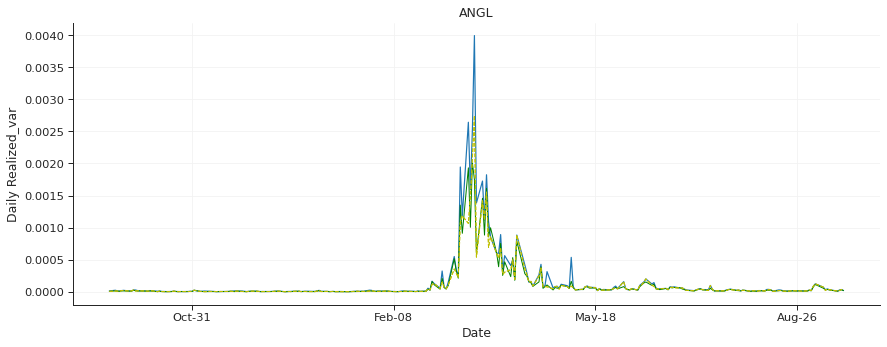

In [206]:
df3['date'] = pd.to_datetime(df3['date'])
g = sns.FacetGrid(df3.query('ticker == "ANGL"'), col = 'ticker', col_wrap = 1, sharex = True, aspect = 2.5, height = 5, sharey=False)
g = (g.map(plt.plot,'date', 'RV')
    .set_titles("{col_name}")
)

g = (g.map(plt.plot,'date', 'BV',color='g',ls='-', lw=1)
    .set_titles("{col_name}")
)

g = (g.map(plt.plot,'date', 'TV',color='y',ls='--',lw=1)
    .set_titles("{col_name}")
     .set_axis_labels("Date", "Daily Realized_var")
)


g = (g.map(plt.plot,'date', 'TV',color='y',ls='--',lw=1)
    .set_titles("{col_name}")
     .set_axis_labels("Date", "Daily Realized_var")
)


#
ax = g.axes.flatten()
for i in range(1):
    ax[i].xaxis.set_major_locator(plt.MaxNLocator(5))
    ax[i].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%b-%d"))
    ticker = ax[i].get_title()
    #ax[i].axvline("2020-09-16", lw=1, ls="--", color="k")
    #ax[i].axvline("2020-08-19", lw=1, ls="--", color="k")
    #ax[i].axvline("2020-09-04", lw=1, ls="--", color="k")
    

#plt.xlim(xmin='2020-01-02')
#plt.xlim(xmax='2020-09-19')
# plt.text('2020-09-01', 0.006,
#     "Something happened?",
#     ha="right",
#     va="center_baseline",
# )

# Save
plt.tight_layout()
#plt.savefig("../exhibits/variance.pdf", dpi=300)

#### Estimate $\Delta X_s^2\sigma_s^2$

- estimate spot variance : $\sigma_s^2 \approx \frac{RV_{s,s+k\Delta_n}}{k\Delta_n}$ 
 
 where $\Delta_n \to \infty$ and $k \asymp \Delta_n^{-\frac{1}{2}}$

In [207]:
k = int(np.ceil(np.sqrt(n)))

In [208]:
#calculate local var for all
data['local_var']  = (data.groupby(['ticker','date'])['rr_c'].rolling(k,min_periods=1).mean()*n).reset_index(drop=True)
data['second_part'] = data['local_var'] * data['rr_d']

In [209]:
data.query('jump==0').head(2)

,ticker,ticker_desc,date,datetime,price,log_price,return,rr_1,time,bipower_factor,time_day_factor,BV,cut,jump,rr,rr_c,rr_d,rr_c4,local_var,second_part
0,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:35:00,29.55,3.386084,-0.001015,0.0,09:35:00,0.000007,7.147779,0.000007,0.003271,0,0.000001,0.000001,0.0,1.060165e-12,0.00008,0.0
1,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 09:40:00,29.55,3.386084,0.000000,0.0,09:40:00,0.000007,7.147779,0.000007,0.003271,0,0.000000,0.000000,0.0,0.000000e+00,0.00004,0.0


In [210]:
data.query('jump==1').head()

,ticker,ticker_desc,date,datetime,price,log_price,return,rr_1,time,bipower_factor,time_day_factor,BV,cut,jump,rr,rr_c,rr_d,rr_c4,local_var,second_part
44,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 13:15:00,29.50,3.384390,-0.002032,0.000000e+00,13:15:00,5.753649e-07,0.591269,0.000007,0.000941,1,0.000004,0.0,0.000004,0.0,3.472376e-06,1.433516e-11
67,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 15:10:00,29.57,3.386760,0.001354,0.000000e+00,15:10:00,5.625428e-07,0.578092,0.000007,0.000930,1,0.000002,0.0,0.000002,0.0,9.941966e-07,1.821702e-12
85,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-23,2019-09-23 10:10:00,29.47,3.383373,-0.003726,0.000000e+00,10:10:00,1.848165e-06,1.899251,0.000013,0.002312,1,0.000014,0.0,0.000014,0.0,1.003902e-05,1.393471e-10
190,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-24,2019-09-24 12:25:00,29.44,3.382354,-0.001019,0.000000e+00,12:25:00,5.040943e-07,0.518028,0.000008,0.000983,1,0.000001,0.0,0.000001,0.0,3.994355e-06,4.143536e-12
213,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-24,2019-09-24 14:20:00,29.46,3.383033,0.001019,6.926233e-07,14:20:00,5.199487e-07,0.534321,0.000008,0.000998,1,0.000001,0.0,0.000001,0.0,1.751121e-05,1.817756e-11


In [211]:
df3['second_part'] = data.groupby(['ticker','date'])['second_part'].sum().reset_index(drop=True)
df3['RV_var'] = 4*df3['second_part'] + 2*df3['IQ']
df3['IV_var'] = 2*df3['IQ']
df3['noise_var_prop'] = 4*df3['second_part'] / df3['RV_var']

In [212]:
df3.head()

,ticker,date,TV,RV,BV,Jump_num,Jump_s2,IQ,Jump_prop,lower_99,upper_99,lower_95,upper_95,lower_90,upper_90,second_part,RV_var,IV_var,noise_var_prop
0,ANGL,2019-09-20,0.000006,0.000012,0.000007,2,0.000006,1.327687e-12,0.489998,0.000002,0.000010,0.000003,0.000009,0.000004,0.000009,1.615687e-11,6.728284e-11,2.655374e-12,0.960534
1,ANGL,2019-09-23,0.000009,0.000023,0.000013,1,0.000014,1.869961e-12,0.613809,0.000004,0.000014,0.000005,0.000013,0.000006,0.000012,1.393471e-10,5.611284e-10,3.739922e-12,0.993335
2,ANGL,2019-09-24,0.000011,0.000013,0.000008,2,0.000002,1.862393e-12,0.160692,0.000006,0.000016,0.000007,0.000015,0.000008,0.000014,2.232110e-11,9.300917e-11,3.724786e-12,0.959952
3,ANGL,2019-09-25,0.000003,0.000013,0.000004,4,0.000009,2.851953e-13,0.726219,0.000002,0.000005,0.000002,0.000005,0.000002,0.000005,2.040744e-11,8.220015e-11,5.703906e-13,0.993061
4,ANGL,2019-09-26,0.000018,0.000018,0.000013,0,0.000000,1.484533e-11,0.000000,0.000004,0.000032,0.000007,0.000029,0.000009,0.000027,0.000000e+00,2.969067e-11,2.969067e-11,0.000000


In [213]:
df3.query("Jump_num==0")

,ticker,date,TV,RV,BV,Jump_num,Jump_s2,IQ,Jump_prop,lower_99,upper_99,lower_95,upper_95,lower_90,upper_90,second_part,RV_var,IV_var,noise_var_prop
4,ANGL,2019-09-26,0.000018,0.000018,0.000013,0,0.0,1.484533e-11,0.0,0.000004,0.000032,0.000007,0.000029,0.000009,0.000027,0.0,2.969067e-11,2.969067e-11,0.0
8,ANGL,2019-10-02,0.000027,0.000027,0.000022,0,0.0,2.066408e-11,0.0,0.000011,0.000044,0.000015,0.000040,0.000017,0.000038,0.0,4.132816e-11,4.132816e-11,0.0
11,ANGL,2019-10-07,0.000012,0.000012,0.000011,0,0.0,4.718679e-12,0.0,0.000004,0.000020,0.000006,0.000018,0.000007,0.000017,0.0,9.437358e-12,9.437358e-12,0.0
13,ANGL,2019-10-09,0.000009,0.000009,0.000006,0,0.0,7.473161e-12,0.0,-0.000001,0.000019,0.000001,0.000016,0.000002,0.000015,0.0,1.494632e-11,1.494632e-11,0.0
15,ANGL,2019-10-11,0.000015,0.000015,0.000010,0,0.0,1.324753e-11,0.0,0.000001,0.000028,0.000004,0.000025,0.000006,0.000023,0.0,2.649506e-11,2.649506e-11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,USIG,2020-09-03,0.000009,0.000009,0.000009,0,0.0,9.553199e-13,0.0,0.000005,0.000012,0.000006,0.000011,0.000006,0.000011,0.0,1.910640e-12,1.910640e-12,0.0
1000,USIG,2020-09-09,0.000005,0.000005,0.000004,0,0.0,6.431585e-13,0.0,0.000002,0.000008,0.000003,0.000008,0.000003,0.000007,0.0,1.286317e-12,1.286317e-12,0.0
1002,USIG,2020-09-11,0.000005,0.000005,0.000005,0,0.0,8.156167e-13,0.0,0.000002,0.000008,0.000002,0.000007,0.000003,0.000007,0.0,1.631233e-12,1.631233e-12,0.0
1003,USIG,2020-09-14,0.000014,0.000014,0.000011,0,0.0,2.180846e-11,0.0,-0.000003,0.000031,0.000001,0.000027,0.000003,0.000025,0.0,4.361692e-11,4.361692e-11,0.0


In [214]:
df3.query("Jump_num>0") #more jumps

,ticker,date,TV,RV,BV,Jump_num,Jump_s2,IQ,Jump_prop,lower_99,upper_99,lower_95,upper_95,lower_90,upper_90,second_part,RV_var,IV_var,noise_var_prop
0,ANGL,2019-09-20,0.000006,0.000012,0.000007,2,5.960680e-06,1.327687e-12,0.489998,0.000002,0.000010,0.000003,0.000009,0.000004,0.000009,1.615687e-11,6.728284e-11,2.655374e-12,0.960534
1,ANGL,2019-09-23,0.000009,0.000023,0.000013,1,1.388055e-05,1.869961e-12,0.613809,0.000004,0.000014,0.000005,0.000013,0.000006,0.000012,1.393471e-10,5.611284e-10,3.739922e-12,0.993335
2,ANGL,2019-09-24,0.000011,0.000013,0.000008,2,2.075401e-06,1.862393e-12,0.160692,0.000006,0.000016,0.000007,0.000015,0.000008,0.000014,2.232110e-11,9.300917e-11,3.724786e-12,0.959952
3,ANGL,2019-09-25,0.000003,0.000013,0.000004,4,9.146633e-06,2.851953e-13,0.726219,0.000002,0.000005,0.000002,0.000005,0.000002,0.000005,2.040744e-11,8.220015e-11,5.703906e-13,0.993061
5,ANGL,2019-09-27,0.000017,0.000021,0.000013,1,4.184838e-06,8.776951e-12,0.195678,0.000006,0.000028,0.000009,0.000025,0.000010,0.000024,9.475972e-11,3.965928e-10,1.755390e-11,0.955738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,USIG,2020-09-08,0.000007,0.000008,0.000006,1,4.301330e-07,1.193313e-12,0.054943,0.000003,0.000011,0.000004,0.000010,0.000005,0.000010,4.510218e-13,4.190713e-12,2.386626e-12,0.430497
1001,USIG,2020-09-10,0.000006,0.000008,0.000007,2,1.993170e-06,5.937403e-13,0.258207,0.000003,0.000009,0.000004,0.000008,0.000004,0.000008,1.647376e-11,6.708254e-11,1.187481e-12,0.982298
1005,USIG,2020-09-16,0.000009,0.000011,0.000009,2,2.090591e-06,2.938992e-12,0.190730,0.000003,0.000015,0.000004,0.000014,0.000005,0.000013,1.303893e-11,5.803371e-11,5.877983e-12,0.898714
1006,USIG,2020-09-17,0.000004,0.000014,0.000003,2,9.849589e-06,3.008810e-13,0.723721,0.000002,0.000006,0.000002,0.000005,0.000002,0.000005,1.395238e-12,6.182714e-12,6.017620e-13,0.902670


### Code book of df3 dataframe
- IQ: the estimator of IQ, that is $\frac{1}{3}\sum {r_i^c}^2$
- second part: the estimator of $\sum \Delta X_s^2\sigma_s^2$
- RV_var: the estimator of RV variance, that is $2\widehat{IQ}+4\sum \Delta X_s^2\sigma_s^2$
- IV_var: the estimator of IV variance, that is  $2\widehat{IQ}$
- noise_var_prop : $\frac{4\sum \Delta X_s^2\sigma_s^2}{RV\_var}$
- Jump_s2 : $\sum J_i^2$
- Jump_prop : $\frac{Jump\_s2}{RV}$
- TV : $\sum {r_i^c}^2 $
- BV : $\frac{n}{n-1}\sum \mid r_i\mid \mid r_{i-1}\mid $
- RV : $\sum {r_i}^2$

where $r_i^c$ is the continouous return and n is the oberservation number of unit day

In [215]:
df3['return'] = data.groupby(['ticker','date'])['return'].sum().reset_index(drop=True)

In [216]:
df3['price'] = data.groupby(['ticker','date'])['price'].last().reset_index(drop=True)
df3['log_price'] = data.groupby(['ticker','date'])['log_price'].last().reset_index(drop=True)

In [217]:
first_price_dict = data.groupby("ticker")["price"].first().to_dict()
data["price_indexed"] = data.groupby("ticker")["price"].apply(
    lambda x: 100 * x / first_price_dict.get(x.name)
)

In [218]:
#close price of 2019-09-20 as base
first_price_dict_day = df3.groupby("ticker")["price"].first().to_dict()
df3["price_indexed"] = df3.groupby("ticker")["price"].apply(
    lambda x: 100 * x / first_price_dict_day.get(x.name)
)

In [219]:
df3

,ticker,date,TV,RV,BV,Jump_num,Jump_s2,IQ,Jump_prop,lower_99,...,lower_90,upper_90,second_part,RV_var,IV_var,noise_var_prop,return,price,log_price,price_indexed
0,ANGL,2019-09-20,0.000006,0.000012,0.000007,2,0.000006,1.327687e-12,0.489998,0.000002,...,0.000004,0.000009,1.615687e-11,6.728284e-11,2.655374e-12,0.960534,-0.000676,29.560,3.386422,100.000000
1,ANGL,2019-09-23,0.000009,0.000023,0.000013,1,0.000014,1.869961e-12,0.613809,0.000004,...,0.000006,0.000012,1.393471e-10,5.611284e-10,3.739922e-12,0.993335,-0.002372,29.480,3.383712,99.729364
2,ANGL,2019-09-24,0.000011,0.000013,0.000008,2,0.000002,1.862393e-12,0.160692,0.000006,...,0.000008,0.000014,2.232110e-11,9.300917e-11,3.724786e-12,0.959952,-0.004408,29.430,3.382015,99.560217
3,ANGL,2019-09-25,0.000003,0.000013,0.000004,4,0.000009,2.851953e-13,0.726219,0.000002,...,0.000002,0.000005,2.040744e-11,8.220015e-11,5.703906e-13,0.993061,-0.001530,29.395,3.380825,99.441813
4,ANGL,2019-09-26,0.000018,0.000018,0.000013,0,0.000000,1.484533e-11,0.000000,0.000004,...,0.000009,0.000027,0.000000e+00,2.969067e-11,2.969067e-11,0.000000,-0.002042,29.350,3.379293,99.289581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,USIG,2020-09-14,0.000014,0.000014,0.000011,0,0.000000,2.180846e-11,0.000000,-0.000003,...,0.000003,0.000025,0.000000e+00,4.361692e-11,4.361692e-11,0.000000,-0.001145,61.110,4.112676,105.180723
1004,USIG,2020-09-15,0.000004,0.000004,0.000004,0,0.000000,4.694464e-13,0.000000,0.000001,...,0.000002,0.000005,0.000000e+00,9.388928e-13,9.388928e-13,0.000000,0.000491,61.170,4.113657,105.283993
1005,USIG,2020-09-16,0.000009,0.000011,0.000009,2,0.000002,2.938992e-12,0.190730,0.000003,...,0.000005,0.000013,1.303893e-11,5.803371e-11,5.877983e-12,0.898714,-0.002612,61.170,4.113657,105.283993
1006,USIG,2020-09-17,0.000004,0.000014,0.000003,2,0.000010,3.008810e-13,0.723721,0.000002,...,0.000002,0.000005,1.395238e-12,6.182714e-12,6.017620e-13,0.902670,-0.003427,61.180,4.113820,105.301205


In [220]:
df3.query('Jump_num>0')

,ticker,date,TV,RV,BV,Jump_num,Jump_s2,IQ,Jump_prop,lower_99,...,lower_90,upper_90,second_part,RV_var,IV_var,noise_var_prop,return,price,log_price,price_indexed
0,ANGL,2019-09-20,0.000006,0.000012,0.000007,2,5.960680e-06,1.327687e-12,0.489998,0.000002,...,0.000004,0.000009,1.615687e-11,6.728284e-11,2.655374e-12,0.960534,-0.000676,29.560,3.386422,100.000000
1,ANGL,2019-09-23,0.000009,0.000023,0.000013,1,1.388055e-05,1.869961e-12,0.613809,0.000004,...,0.000006,0.000012,1.393471e-10,5.611284e-10,3.739922e-12,0.993335,-0.002372,29.480,3.383712,99.729364
2,ANGL,2019-09-24,0.000011,0.000013,0.000008,2,2.075401e-06,1.862393e-12,0.160692,0.000006,...,0.000008,0.000014,2.232110e-11,9.300917e-11,3.724786e-12,0.959952,-0.004408,29.430,3.382015,99.560217
3,ANGL,2019-09-25,0.000003,0.000013,0.000004,4,9.146633e-06,2.851953e-13,0.726219,0.000002,...,0.000002,0.000005,2.040744e-11,8.220015e-11,5.703906e-13,0.993061,-0.001530,29.395,3.380825,99.441813
5,ANGL,2019-09-27,0.000017,0.000021,0.000013,1,4.184838e-06,8.776951e-12,0.195678,0.000006,...,0.000010,0.000024,9.475972e-11,3.965928e-10,1.755390e-11,0.955738,-0.002387,29.290,3.377246,99.086604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,USIG,2020-09-08,0.000007,0.000008,0.000006,1,4.301330e-07,1.193313e-12,0.054943,0.000003,...,0.000005,0.000010,4.510218e-13,4.190713e-12,2.386626e-12,0.430497,0.000821,60.960,4.110218,104.922547
1001,USIG,2020-09-10,0.000006,0.000008,0.000007,2,1.993170e-06,5.937403e-13,0.258207,0.000003,...,0.000004,0.000008,1.647376e-11,6.708254e-11,1.187481e-12,0.982298,0.000328,60.950,4.110054,104.905336
1005,USIG,2020-09-16,0.000009,0.000011,0.000009,2,2.090591e-06,2.938992e-12,0.190730,0.000003,...,0.000005,0.000013,1.303893e-11,5.803371e-11,5.877983e-12,0.898714,-0.002612,61.170,4.113657,105.283993
1006,USIG,2020-09-17,0.000004,0.000014,0.000003,2,9.849589e-06,3.008810e-13,0.723721,0.000002,...,0.000002,0.000005,1.395238e-12,6.182714e-12,6.017620e-13,0.902670,-0.003427,61.180,4.113820,105.301205


In [221]:
df3.describe()

,TV,RV,BV,Jump_num,Jump_s2,IQ,Jump_prop,lower_99,upper_99,lower_95,...,lower_90,upper_90,second_part,RV_var,IV_var,noise_var_prop,return,price,log_price,price_indexed
count,1008.000000,1.008000e+03,1.008000e+03,1008.000000,1.008000e+03,1.008000e+03,1008.000000,1.008000e+03,1008.000000,1.008000e+03,...,1.008000e+03,1008.000000,1.008000e+03,1.008000e+03,1.008000e+03,1.007000e+03,1008.000000,1008.000000,1008.000000,1008.000000
mean,0.000051,8.304301e-05,6.083962e-05,2.875992,3.158190e-05,6.813162e-09,0.251652,1.077593e-05,0.000092,2.050351e-05,...,2.548068e-05,0.000077,4.995500e-09,3.360832e-08,1.362632e-08,6.580508e-01,-0.000132,44.322624,3.748917,100.227911
std,0.000271,5.985921e-04,4.915550e-04,3.408253,3.578507e-04,1.371015e-07,0.237497,7.860982e-05,0.000565,7.835211e-05,...,1.002322e-04,0.000458,7.504509e-08,4.575531e-07,2.742030e-07,4.140872e-01,0.006046,12.531981,0.296385,3.987118
min,0.000000,2.979137e-07,6.405153e-08,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.534100e-03,0.000000,-5.109400e-04,...,-1.412801e-08,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.047475,21.690000,3.076851,73.376184
25%,0.000001,1.795493e-06,1.128781e-06,1.000000,3.471172e-08,3.416417e-14,0.044329,2.853611e-07,0.000002,5.077902e-07,...,6.092037e-07,0.000002,0.000000e+00,9.531491e-13,6.832835e-14,2.688984e-12,-0.001283,30.887500,3.430345,99.829021
50%,0.000003,4.691317e-06,3.183805e-06,2.000000,6.024083e-07,3.158708e-13,0.199244,8.679200e-07,0.000006,1.453326e-06,...,1.885247e-06,0.000005,3.975489e-13,6.874253e-12,6.317416e-13,9.137612e-01,0.000000,42.160000,3.734043,100.483367
75%,0.000014,1.681694e-05,1.263520e-05,4.000000,2.152338e-06,6.968596e-12,0.401231,4.101585e-06,0.000021,6.458515e-06,...,7.737712e-06,0.000019,5.275285e-12,7.288960e-11,1.393719e-11,9.746470e-01,0.000963,55.020000,4.007697,102.327883
max,0.006311,1.678930e-02,1.435150e-02,21.000000,1.047834e-02,4.108076e-06,1.000000,7.176945e-04,0.013694,1.045885e-03,...,1.596184e-03,0.011026,2.261522e-06,9.679252e-06,8.216151e-06,9.989026e-01,0.048197,62.190000,4.130194,107.039587


### signature plot

In [222]:
def re_resample_data(data,sampling_freq):
    # Fix datetime type
    data['datetime']=pd.to_datetime(data['datetime'])
    data=data.sort_values(by=["ticker", "date", "datetime"])
    
    # Resample on a given basis
    resample=(
    data.set_index("datetime")
    .groupby(["ticker", "ticker_desc", "date"])
    .resample(sampling_freq,label = 'right',closed='right')["price"]
    .last()
    .reset_index().copy()
    )
    
    # Forward fill missing prices for particular intervals using last observed price
    resample["price"] = (
    resample.sort_values(by="datetime")
    .groupby(["ticker", "ticker_desc", "date"])["price"]
    .fillna(method="ffill")
    )
       
    
    # Add returns
    resample = resample.sort_values(by=["ticker", "date", "datetime"])
    resample["log_price"] = np.log(resample["price"])
    resample["return"] = resample.groupby(["ticker", "date"])["log_price"].diff(1).fillna(0)
    
    return resample

In [223]:
#ticker_1s = pd.read_csv("../data/clean/ticker_1s.csv")

In [224]:
#ticker_1s.head()

In [225]:
def explore_data(ticker_df, L=120, step=5): 
    temp_df = ticker_df.query("date <= '2020-08-16' and date >= '2020-05-12'")[["ticker", "ticker_desc", "date", "datetime", "price"]] .copy() # use 1 month data to plot signature figure
    
    rv = {}
    for i in tqdm(range(1,L+1)):
        df = re_resample_data(temp_df, sampling_freq = str(i*step)+'s')
        df['return_sq'] = np.square(df['return'])
        rv[i] = df.groupby(['ticker','date'])['return_sq'].sum() #daily rv with sample freq = i
    return rv

In [226]:
# k2=explore_data(ticker_5s,step = 1)
# df_rv=(pd.melt(pd.DataFrame.from_dict(k2).reset_index().rename(columns={0:'daily_rv','index':'freq(s)'}), 
#                 id_vars=['ticker','date']).rename(columns={'variable':'freq','value':'realized_var'})
#         .groupby(['ticker','freq']).mean().reset_index())
# df_rv['realized_vol']=np.sqrt(df_rv['realized_var'])
# df_rv['freq(s)'] = 5* df_rv['freq']
# df_rv['freq(min)'] =df_rv['freq(s)']/60

In [227]:
df_rv2 = pd.read_csv('../data/sign_rv.csv').query("ticker == ['ANGL', 'SPIB','USIG','IGSB']").drop_duplicates()

In [228]:
df_rv2['freq(min)'] =df_rv2['freq']/60
df_rv2 = df_rv2.sort_values(by=['ticker','freq'])

In [229]:
df_rv2.query('ticker=="ANGL"') 

,ticker,realized_var,realized_vol,freq,freq(min)
0,ANGL,0.035865,0.178258,1,0.016667
32,ANGL,0.031078,0.166853,6,0.100000
48,ANGL,0.029607,0.162637,11,0.183333
64,ANGL,0.029523,0.161535,16,0.266667
80,ANGL,0.027609,0.157378,21,0.350000
...,...,...,...,...,...
1856,ANGL,0.012057,0.103843,576,9.600000
1872,ANGL,0.011172,0.101099,581,9.683333
1888,ANGL,0.011267,0.100646,586,9.766667
1904,ANGL,0.011009,0.099849,591,9.850000


# Plots 

## Summary Subplots

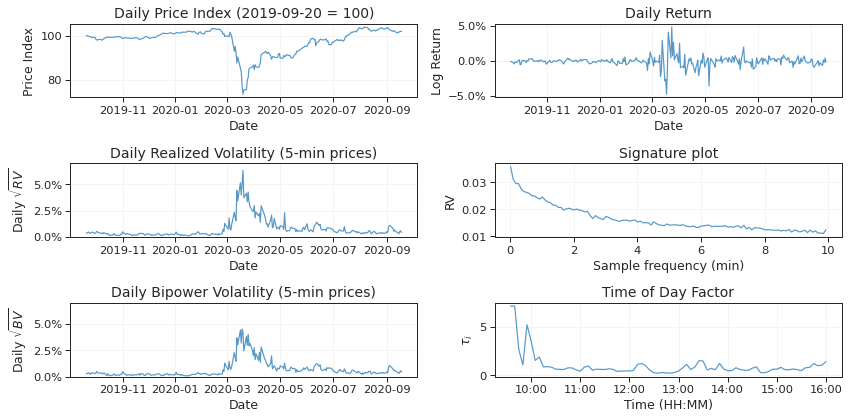

In [230]:
ticker = "ANGL"
plot_data = df3.query("ticker == @ticker")
plot_data2 = df_rv2.query("ticker == @ticker")
plot_data3 = data.query('ticker == @ticker').groupby(['time'])[['datetime', 'time_day_factor']].first().reset_index()

fig, axs = plt.subplots(3, 2, figsize=(12, 6))

## Price index
axs[0, 0].plot(
    plot_data["date"],
    plot_data["price_indexed"],
    alpha=0.75,
)
axs[0, 0].set_title("Daily Price Index (2019-09-20 = 100)")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("Price Index")

## Daily return
axs[0, 1].plot(
    plot_data["date"],
    plot_data["return"],
    alpha=0.75,
)
axs[0, 1].set_title("Daily Return")
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("Log Return")
axs[0, 1].yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))

## Daily RV
axs[1, 0].plot(
    plot_data["date"],
    np.sqrt(plot_data["RV"]),
    alpha=0.75,
)
axs[1, 0].set_title("Daily Realized Volatility (5-min prices)")
axs[1, 0].set_xlabel("Date")
axs[1, 0].yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))
axs[1, 0].set_ylabel("Daily $\sqrt{RV}$")
axs[1, 0].set_ylim(0, 0.07)

## Signature plot
axs[1, 1].plot(
    plot_data2["freq(min)"],
    plot_data2["realized_var"],
    alpha=0.75,
)
axs[1, 1].set_xlabel("Sample frequency (min)")
axs[1, 1].set_title("Signature plot")
axs[1, 1].set_ylabel("RV")

## BV plot
axs[2, 0].plot(
    plot_data["date"],
    np.sqrt(plot_data["BV"]),
    alpha=0.75,
)
axs[2, 0].set_title("Daily Bipower Volatility (5-min prices)")
axs[2, 0].set_xlabel("Date")
axs[2, 0].yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))
axs[2, 0].set_ylabel("Daily $\sqrt{BV}$")
axs[2, 0].set_ylim(0, 0.07)

## TOD plot
axs[2, 1].plot(
    plot_data3["datetime"],
    plot_data3['time_day_factor'],
    alpha=0.75,
)
axs[2, 1].set_xlabel("Time (HH:MM)")
axs[2, 1].set_title("Time of Day Factor")
axs[2, 1].set_ylabel("$\\tau_i$")
axs[2, 1].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))


# Save
plt.tight_layout()
plt.savefig("../exhibits/summary_angl.pdf")

## RV, TV, and Jumps

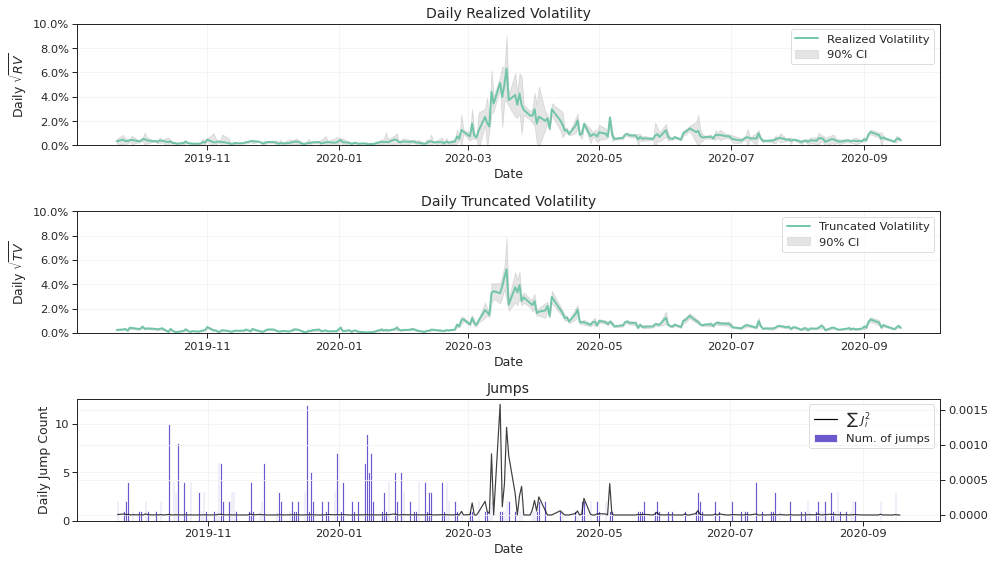

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

In [231]:
ticker_list = df3['ticker'].unique()
for i in range(len(ticker_list)):
    
    ticker = ticker_list[i]
    
    plot_data = df3.query('ticker == @ticker').copy()
    jump = df3.query('ticker == @ticker and Jump_num>5').copy()

    plot_data["Rvol_se"] = np.sqrt(plot_data["RV_var"]) / np.sqrt(4 * plot_data["RV"])
    plot_data["Tvol_se"] = np.sqrt(plot_data["IV_var"]) / np.sqrt(4 * plot_data["TV"])
    plot_data["date"] = pd.to_datetime(plot_data["date"])

    fig, axs = plt.subplots(3, 1, figsize=(14, 8))
    
    ################## 1
    axs[0].plot(
        plot_data["date"],
        np.sqrt(plot_data["RV"]),
        color = sns.color_palette('Set2',4)[i],
        alpha=0.9,
        lw = 2,
        label="Realized Volatility",
    )
    axs[0].fill_between(
        plot_data["date"],
        np.sqrt(plot_data["RV"]) - stats.norm.ppf(0.05) * plot_data["Rvol_se"],
        np.sqrt(plot_data["RV"]) + stats.norm.ppf(0.05) * plot_data["Rvol_se"],
        color="k",
        alpha=0.1,
        label="90% CI",
    )
    # axs[0].set_ylabel('Price Indexed (2019-09-20 09:30:00 = 100)')
    axs[0].set_title("Daily Realized Volatility")
    axs[0].set_xlabel("Date")
    axs[0].legend()
    axs[0].set_ylim(0,0.1)
    axs[0].yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))
    axs[0].set_ylabel("Daily $\sqrt{RV}$")

    ################ 2
    axs[1].plot(
        plot_data["date"],
        np.sqrt(plot_data["TV"]),
        color = sns.color_palette('Set2',4)[i],
        alpha=0.9,
        lw = 2,
        label="Truncated Volatility",
    )
    # axs[1].plot(
    #     plot_data["date"],
    #     np.sqrt(plot_data["IV_var"]) / np.sqrt(4 * plot_data["TV"]),
    #     # color="k",
    #     alpha=0.75,
    #     label="Std. error",
    # )

    axs[1].fill_between(
        plot_data["date"],
        np.sqrt(plot_data["TV"]) - stats.norm.ppf(0.05) * plot_data["Tvol_se"],
        np.sqrt(plot_data["TV"]) + stats.norm.ppf(0.05) * plot_data["Tvol_se"],
        color="k",
        alpha=0.1,
        label="90% CI",
    )
    axs[1].set_title("Daily Truncated Volatility")
    axs[1].set_xlabel("Date")
    axs[1].legend()
    axs[1].set_ylim(0,0.1)
    axs[1].yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))
    axs[1].set_ylabel("Daily $\sqrt{TV}$")

    ################ 3


    axs2 = axs[2].twinx()
    axs[2].bar(plot_data["date"], (plot_data["Jump_num"]), color="slateblue", alpha=1, label="Num. of jumps")
    axs[2].set_ylabel('Daily Jump Count')
    axs2.plot(plot_data["date"], (plot_data["Jump_s2"]), color="k", alpha=0.75, label="$\sum ~ J_i^2$")

    axs[2].plot(np.nan, "-k", label="$\sum ~ J_i^2$")  # Make an agent in ax
    axs[2].legend(loc='upper right')
    axs[2].set_title("Jumps")
    axs[2].set_xlabel("Date")


    plt.tight_layout()
    plt.savefig("../exhibits/vol_timeseries_" + ticker + ".pdf")
    if i > 0: plt.clf()

## RV, TV, and Jumps Zoom

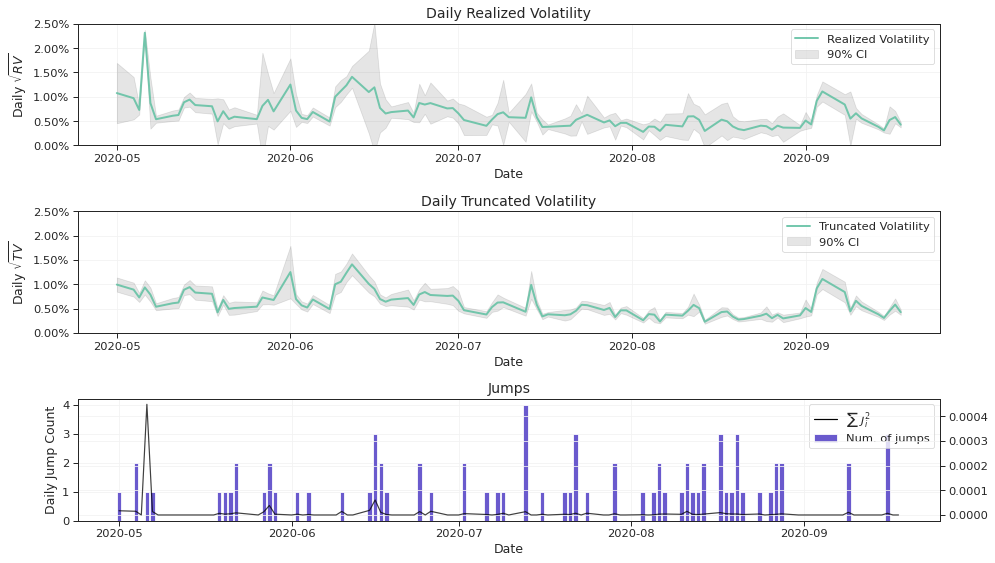

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

In [232]:
ticker_list = df3['ticker'].unique()
for i in range(len(ticker_list)):
    
    ticker = ticker_list[i]
    
    plot_data = df3.query('ticker == @ticker').query('date >= "2020-05-01"').copy()
    jump = df3.query('ticker == @ticker and Jump_num>5').copy()

    plot_data["Rvol_se"] = np.sqrt(plot_data["RV_var"]) / np.sqrt(4 * plot_data["RV"])
    plot_data["Tvol_se"] = np.sqrt(plot_data["IV_var"]) / np.sqrt(4 * plot_data["TV"])
    plot_data["date"] = pd.to_datetime(plot_data["date"])

    fig, axs = plt.subplots(3, 1, figsize=(14, 8))
    
    ################## 1
    axs[0].plot(
        plot_data["date"],
        np.sqrt(plot_data["RV"]),
        color = sns.color_palette('Set2',4)[i],
        alpha=0.9,
        lw = 2,
        label="Realized Volatility",
    )
    axs[0].fill_between(
        plot_data["date"],
        np.sqrt(plot_data["RV"]) - stats.norm.ppf(0.05) * plot_data["Rvol_se"],
        np.sqrt(plot_data["RV"]) + stats.norm.ppf(0.05) * plot_data["Rvol_se"],
        color="k",
        alpha=0.1,
        label="90% CI",
    )
    # axs[0].set_ylabel('Price Indexed (2019-09-20 09:30:00 = 100)')
    axs[0].set_title("Daily Realized Volatility")
    axs[0].set_xlabel("Date")
    axs[0].legend()
    axs[0].set_ylim(0,0.025)
    axs[0].yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))
    axs[0].set_ylabel("Daily $\sqrt{RV}$")

    ################ 2
    axs[1].plot(
        plot_data["date"],
        np.sqrt(plot_data["TV"]),
        color = sns.color_palette('Set2',4)[i],
        alpha=0.9,
        lw = 2,
        label="Truncated Volatility",
    )

    axs[1].fill_between(
        plot_data["date"],
        np.sqrt(plot_data["TV"]) - stats.norm.ppf(0.05) * plot_data["Tvol_se"],
        np.sqrt(plot_data["TV"]) + stats.norm.ppf(0.05) * plot_data["Tvol_se"],
        color="k",
        alpha=0.1,
        label="90% CI",
    )
    axs[1].set_title("Daily Truncated Volatility")
    axs[1].set_xlabel("Date")
    axs[1].legend()
    axs[1].set_ylim(0,0.025)
    axs[1].yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))
    axs[1].set_ylabel("Daily $\sqrt{TV}$")

    ################ 3


    axs2 = axs[2].twinx()
    axs[2].bar(plot_data["date"], (plot_data["Jump_num"]), color="slateblue", alpha=1, label="Num. of jumps")
    axs[2].set_ylabel('Daily Jump Count')
    axs2.plot(plot_data["date"], (plot_data["Jump_s2"]), color="k", alpha=0.75, label="$\sum ~ J_i^2$")

    axs[2].plot(np.nan, "-k", label="$\sum ~ J_i^2$")  # Make an agent in ax
    axs[2].legend(loc='upper right')
    axs[2].set_title("Jumps")
    axs[2].set_xlabel("Date")


    plt.tight_layout()
    plt.savefig("../exhibits/vol_timeseries_maytonow_" + ticker + ".pdf")
    if i > 0: plt.clf()

### Jump detection

In [233]:
data.query('ticker == "ANGL" & jump > 0')

,ticker,ticker_desc,date,datetime,price,log_price,return,rr_1,time,bipower_factor,...,BV,cut,jump,rr,rr_c,rr_d,rr_c4,local_var,second_part,price_indexed
44,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 13:15:00,29.50,3.384390,-0.002032,0.000000e+00,13:15:00,5.753649e-07,...,0.000007,0.000941,1,0.000004,0.0,0.000004,0.0,3.472376e-06,1.433516e-11,99.830795
67,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-20,2019-09-20 15:10:00,29.57,3.386760,0.001354,0.000000e+00,15:10:00,5.625428e-07,...,0.000007,0.000930,1,0.000002,0.0,0.000002,0.0,9.941966e-07,1.821702e-12,100.067682
85,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-23,2019-09-23 10:10:00,29.47,3.383373,-0.003726,0.000000e+00,10:10:00,1.848165e-06,...,0.000013,0.002312,1,0.000014,0.0,0.000014,0.0,1.003902e-05,1.393471e-10,99.729272
190,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-24,2019-09-24 12:25:00,29.44,3.382354,-0.001019,0.000000e+00,12:25:00,5.040943e-07,...,0.000008,0.000983,1,0.000001,0.0,0.000001,0.0,3.994355e-06,4.143536e-12,99.627750
213,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2019-09-24,2019-09-24 14:20:00,29.46,3.383033,0.001019,6.926233e-07,14:20:00,5.199487e-07,...,0.000008,0.000998,1,0.000001,0.0,0.000001,0.0,1.751121e-05,1.817756e-11,99.695431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19006,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-09-09,2020-09-09 10:45:00,30.29,3.410818,0.002314,7.657350e-07,10:45:00,7.536018e-07,...,0.000030,0.002272,1,0.000005,0.0,0.000005,0.0,3.281161e-05,1.756425e-10,102.504230
19007,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-09-09,2020-09-09 10:50:00,30.22,3.408504,-0.002314,5.353061e-06,10:50:00,7.438686e-07,...,0.000030,0.002257,1,0.000005,0.0,0.000005,0.0,3.186168e-05,1.705575e-10,102.267343
19439,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-09-16,2020-09-16 14:20:00,30.17,3.406848,0.001659,1.101727e-06,14:20:00,5.199487e-07,...,0.000018,0.001482,1,0.000003,0.0,0.000003,0.0,5.737546e-06,1.578468e-11,102.098139
19443,ANGL,VanEck Vectors Fallen Angel High Yield Bond ETF,2020-09-16,2020-09-16 14:40:00,30.18,3.407179,0.001492,4.952428e-07,14:40:00,2.703503e-07,...,0.000018,0.001069,1,0.000002,0.0,0.000002,0.0,1.551014e-05,3.453427e-11,102.131980


## TV All in One

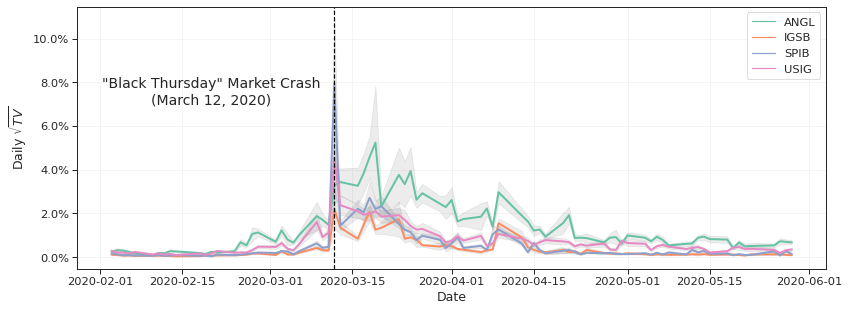

In [234]:
fig, ax = plt.subplots(1, figsize=(12, 4.5))
plot_data = df3.query('date >= "2020-02-01" & date < "2020-06-01"').copy()

plot_data["Tvol"] = np.sqrt(plot_data["TV"])
plot_data["Rvol"] = np.sqrt(plot_data["RV"])
plot_data["Tvol_se"] = np.sqrt(plot_data["IV_var"]) / np.sqrt(4 * plot_data["TV"])
plot_data["Rvol_se"] = np.sqrt(plot_data["RV_var"]) / np.sqrt(4 * plot_data["RV"])
plot_data["date"] = pd.to_datetime(plot_data["date"])

for ticker in df3["ticker"].unique():
    ax.fill_between(
        plot_data.query("ticker == @ticker")["date"],
        np.sqrt(plot_data.query("ticker == @ticker")["TV"])
        - stats.norm.ppf(0.05) * plot_data.query("ticker == @ticker")["Tvol_se"],
        np.sqrt(plot_data.query("ticker == @ticker")["TV"])
        + stats.norm.ppf(0.05) * plot_data.query("ticker == @ticker")["Tvol_se"],
        color="k",
        alpha=0.075,
    )

sns.lineplot(
    x="date", y="Tvol", hue="ticker", data=plot_data, palette=sns.color_palette("Set2", 4), lw=2, ax=ax
)
plt.axvline(pd.to_datetime(["2020-03-12"]), 0, 1, color="k", ls="dashed")
plt.text(
    pd.to_datetime(["2020-02-20"]),
    0.07,
    '"Black Thursday" Market Crash\n(March 12, 2020)',
    ha="center",
    fontsize=14,
)

ax.legend()
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))
ax.set_xlabel("Date")
ax.set_ylabel("Daily $\sqrt{TV}$")

plt.tight_layout()
plt.savefig("../exhibits/tv_black_thursday.pdf")

In [235]:
print(
    ((
        plot_data.query('date == "2020-03-12"').groupby(["ticker"])[
            ["Rvol", "Rvol_se", "Tvol", "Tvol_se"]
        ]
    ).first()
    * 100).round(4).to_latex()
)

\begin{tabular}{lrrrr}
\toprule
{} &     Rvol &  Rvol\_se &    Tvol &  Tvol\_se \\
ticker &          &          &         &          \\
\midrule
ANGL   &   4.4099 &   1.0882 &  3.2763 &   0.5129 \\
IGSB   &   3.4098 &   1.0813 &  2.2148 &   0.5576 \\
SPIB   &  12.9574 &   1.1954 &  7.9442 &   1.8041 \\
USIG   &   5.8144 &   2.6754 &  4.5674 &   0.8711 \\
\bottomrule
\end{tabular}



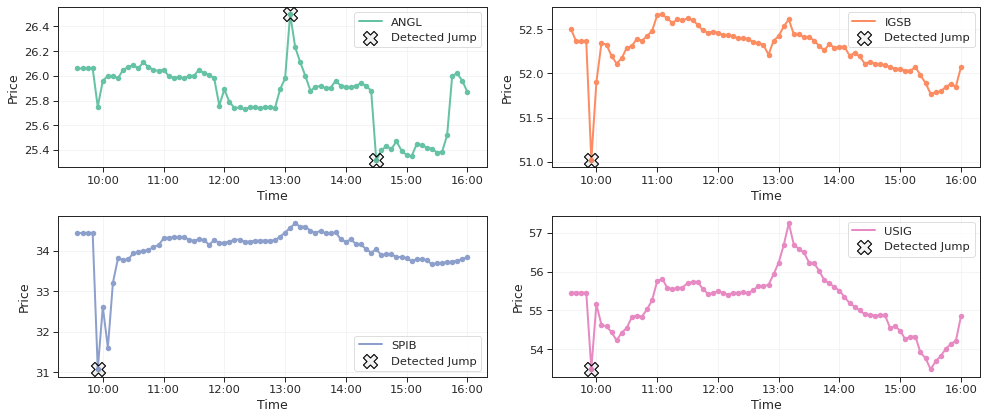

In [236]:
fig, axs = plt.subplots(figsize=(14, 6), nrows=2, ncols=2)
ticker_list = df3["ticker"].unique()

for i in range(len(ticker_list)):

    ticker = ticker_list[i]
    ax = axs.reshape(-1)[i]
    plot_data = data.query('ticker == @ticker & date == "2020-03-12"').copy()

    sns.lineplot(
        x="datetime",
        y="price",
        data=plot_data,
        ax=ax,
        lw=2,
        label=ticker,
        color=sns.color_palette("Set2", 4)[i],
    )
    sns.scatterplot(
        x="datetime",
        y="price",
        data=plot_data,
        ax=ax,
        s=30,
        edgecolor=(0, 0, 0, 0),
        color=sns.color_palette("Set2", 4)[i],
    )
    sns.scatterplot(
        x="datetime",
        y="price",
        s=200,
        edgecolor="k",
        color=(0, 0, 0, 0.05),
        marker="X",
        data=plot_data.query("jump == 1"),
        label="Detected Jump",
        ax=ax,
        **{"zorder": 99}
    )
    ax.set_ylabel("Price")
    ax.set_xlabel("Time")
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

plt.tight_layout()
plt.savefig('../exhibits/jumps_black_thursday.pdf')

## What Do Jumps look like?

**Number of Jumps Distribution**

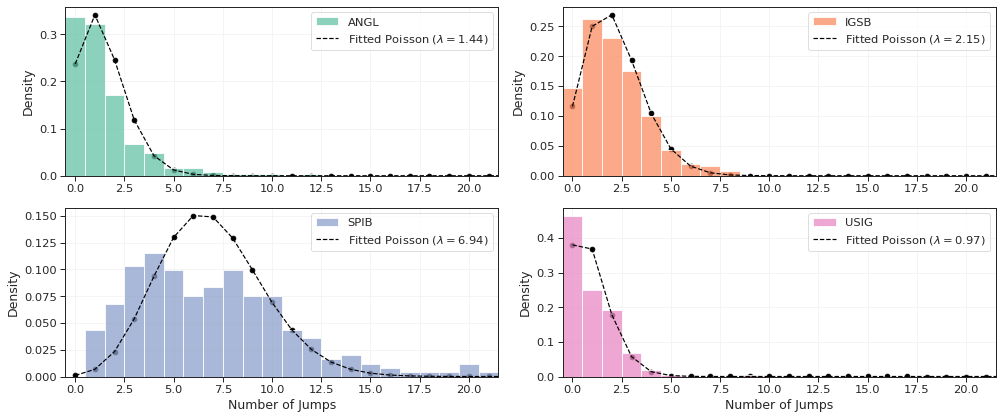

In [237]:
fig, axs = plt.subplots(figsize=(14, 6), nrows=2, ncols=2)
ticker_list = df3["ticker"].unique()

for i in range(len(ticker_list)):

    ticker = ticker_list[i]
    ax = axs.reshape(-1)[i]

    plot_data = df3.query("ticker == @ticker").copy()

    # Plot of number of jumps on each day
    sns.histplot(
        data=plot_data,
        x="Jump_num",
        stat="density",
        discrete=True,
        ax=ax,
        label=ticker,
        color=sns.color_palette("Set2", 4)[i],
    )

    # Fitted Poisson dist
    lambda_hat = plot_data["Jump_num"].mean()
    ax.plot(
        np.arange(0, 35),
        stats.poisson.pmf(np.arange(0, 35), lambda_hat),
        color="k",
        ls="dashed",
        label=f"Fitted Poisson ($\lambda = {lambda_hat:.2f}$)",
    )
    ax.scatter(
        np.arange(0, 35),
        stats.poisson.pmf(np.arange(0, 35), lambda_hat),
        color="k",
    )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title="", loc="upper right")
    if i > 1:
        ax.set_xlabel("Number of Jumps")
    else:
        ax.set_xlabel("")
    ax.set_xlim(-0.5, 21.5)

plt.tight_layout()
plt.savefig('../exhibits/dist_jumpcount.pdf')

**Whats going on with SPIB?**

In [238]:
list(np.where(plot_data['jump']==1)[0])

KeyError: 'jump'

In [ ]:
jump_idx_list = list(np.where(plot_data['jump']==1)[0])

for j in range(len(jump_idx_list)):
    plot_data_sub = plot_data.iloc[[jump_idx_list[0]-1,jump_idx_list[0]],:]
 
    plt.plot(
        plot_data["datetime"],
        plot_data["price_jump"],
        color="orange",
        label=("Detected Jump Returns" if j == 0 else None),
        lw=3
    )

In [ ]:
fig, axs = plt.subplots(figsize=(11, 5), nrows=2, ncols=1)
ticker_list = df3["ticker"].unique()

ticker = "SPIB"

ax = axs.reshape(-1)[0]
plot_data = data.query('ticker == @ticker & date == "2020-08-19"').copy()
plot_data["jump_lag"] = plot_data["jump"].shift(-1)
plot_data["price_jump"] = np.nan
plot_data.loc[plot_data["jump"] == 1, "price_jump"] = plot_data["price"].loc[plot_data["jump"] == 1]
plot_data.loc[plot_data["jump_lag"] == 1, "price_jump"] = plot_data["price"].loc[
    plot_data["jump_lag"] == 1
]
i = 2

# Prices
sns.lineplot(
    x="datetime",
    y="price",
    data=plot_data,
    ax=ax,
    lw=2.5,
    label=ticker,
    color=sns.color_palette("Set2", 4)[i],
)
# Jump line highlights
jump_idx_list = list(np.where(plot_data['jump']==1)[0])
for j in range(len(jump_idx_list)):
    plot_data_sub = plot_data.iloc[[jump_idx_list[j]-1,jump_idx_list[j]],:]
 
    ax.plot(
        plot_data_sub["datetime"],
        plot_data_sub["price_jump"],
        color="orange",
        label=("Detected Jump Returns" if j == 0 else None),
        lw=3
    )
# Jump markers
sns.scatterplot(
    x="datetime",
    y="price",
    s=150,
    edgecolor="k",
    color=(0, 0, 0, 0.05),
    marker="X",
    data=plot_data.query("jump == 1"),
    label="Detected Jump",
    ax=ax,
    **{'zorder':99}
)
ax.set_ylabel("Price")
ax.set_xlabel("Time")
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))
ax.legend(loc = 'lower left', ncol = 3)

ax = axs.reshape(-1)[1]
ax.bar(
    x = plot_data['datetime'],
    height = plot_data['return'],
    width = pd.Timedelta('5min'),
    color = sns.color_palette("Set2", 4)[i]
)
ax.bar(
    x = plot_data['datetime'],
    height = plot_data['return']*plot_data['jump'],
    width = pd.Timedelta('5min'),
    color = 'orange',
)
ax.axhline(0,0,1,color = 'k', alpha = 0.5)
ax.set_ylabel('Return')
ax.set_xlabel("Time")
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))    

plt.tight_layout()
plt.savefig('../exhibits/jumps_spib_fomc081920.pdf')

In [ ]:
ticker = "SPIB"
plot_data = ticker_5s.query("ticker == @ticker").query('date == "2020-09-18"').iloc[1:]
plot_data["datetime"] = pd.to_datetime(plot_data["datetime"])

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

sns.lineplot(data=plot_data, x="datetime", y="price", ax=axs[0])
axs[0].set_title('5 Second Prices')
axs[0].set_ylabel('Price')
axs[0].set_xlabel('')
axs[0].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

sns.lineplot(
    data=plot_data.set_index("datetime").resample("5min", label="right").last().reset_index(),
    x="datetime",
    y="price",
    ax=axs[1],
)
axs[1].set_title('5 Minute Prices')
axs[1].set_ylabel('Price')
axs[1].set_xlabel('Time')
axs[1].xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%H:%M"))

plt.tight_layout()

**Does it look better if we raise the cut for detecting jumps?**

In [ ]:
fig, axs = plt.subplots(figsize=(14, 6), nrows=2, ncols=3)
ticker = "SPIB"
cut_factors = np.linspace(1, 2, 6)

for i in range(len(cut_factors)):

    cut_factor = cut_factors[i]
    data["jump_highercut"] = np.where(np.abs(data["return"]) > data["cut"] * cut_factor, 1, 0)
    ax = axs.reshape(-1)[i]

    plot_data = data.query("ticker == @ticker").copy()
    plot_data = plot_data.groupby(["ticker", "date"])["jump_highercut"].sum().reset_index()
    plot_data.columns = ["ticker", " date", "Jump_num"]

    # Plot of number of jumps on each day
    sns.histplot(
        data=plot_data,
        x="Jump_num",
        stat="density",
        discrete=True,
        ax=ax,
        label=f"{ticker}: $\\alpha={4*cut_factor:0.2f}$",
        color=sns.color_palette("viridis", len(cut_factors))[i],
        alpha=0.6,
    )

    # Fitted Poisson dist
    lambda_hat = plot_data["Jump_num"].mean()
    ax.plot(
        np.arange(0, 35),
        stats.poisson.pmf(np.arange(0, 35), lambda_hat),
        color="k",
        ls="dashed",
        label=f"Fitted Poisson ($\lambda = {lambda_hat:.2f}$)",
    )
    ax.scatter(
        np.arange(0, 35),
        stats.poisson.pmf(np.arange(0, 35), lambda_hat),
        color="k",
    )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title="", loc="upper right")
    if i > 2:
        ax.set_xlabel("Number of Jumps")
    else:
        ax.set_xlabel("")
    ax.set_xlim(-0.5, 20.5)

plt.tight_layout()
plt.savefig('../exhibits/spib_jumpcount_adjust.pdf')

**Size of Jumps Distribution**

In [ ]:
fig, axs = plt.subplots(figsize=(14, 5), nrows=2, ncols=2)

ticker_list = df3["ticker"].unique()

for i in range(len(ticker_list)):

    ticker = ticker_list[i]
    ax = axs.reshape(-1)[i]

    plot_data = data.query("ticker == @ticker & jump == 1").copy().dropna()

    # Plot of number of jumps on each day
    sns.histplot(
        data=plot_data.loc[plot_data["return"].abs() < 0.01, :],
        x="return",
        bins=100,
        stat="density",
        ax=ax,
        label=ticker,
        edgecolor=None,
        color=sns.color_palette("Set2", 4)[i],
    )
    sns.kdeplot(
        data=plot_data.loc[plot_data["return"].abs() < 0.01, :],
        x="return",
        ax=ax,
        color="k",
        ls="dashed",
        label="Fitted KDE",
    )
    ax.set_xlim(-0.01, 0.01)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title="", loc="upper right")
    if i > 1:
        ax.set_xlabel("Jump Size")
    else:
        ax.set_xlabel("")

plt.tight_layout()
plt.savefig('../exhibits/dist_jumpsize.pdf')